In [ ]:
!pip install git+https://github.com/modAL-python/modAL.git

  Cloning https://github.com/modAL-python/modAL.git to /tmp/pip-req-build-er7sn53a
  Running command git clone --filter=blob:none --quiet https://github.com/modAL-python/modAL.git /tmp/pip-req-build-er7sn53a
  Resolved https://github.com/modAL-python/modAL.git to commit bba6f6fd00dbb862b1e09259b78caf6cffa2e755
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 1.3 MB/s eta 0:00:00
  Created wheel for modAL-python: filename=modAL_python-0.4.2-py3-none-any.whl size=32646 sha256=78bdefc560921cae5fdc1f907e89f473d0a7488febb5afa0dfbf583dbabe6076
  Stored in directory: /tmp/pip-ephem-wheel-cache-nveuguwc/wheels/87/f9/71/88b176e3d0684b68b377241dc3da25e38bd3133c2dd23fbba4
Successfully built modAL-python


In [ ]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interactive

from IPython import display
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl

import warnings

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [ ]:
pca = PCA(n_components=2, random_state = 42)
transformed_data = pca.fit_transform(X = X)

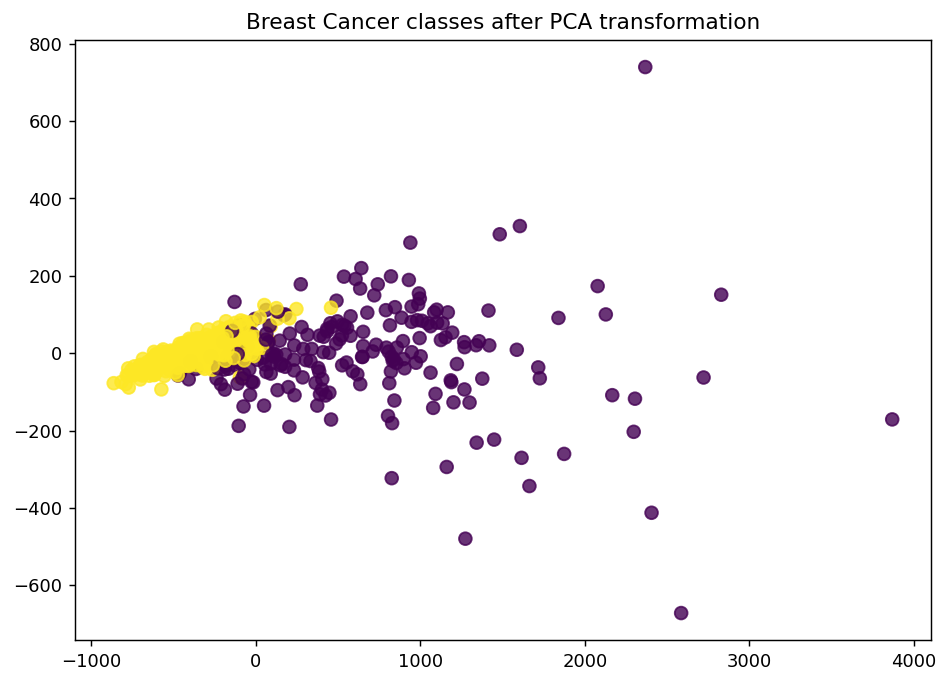

In [ ]:
x_component, y_component = transformed_data[:, 0], transformed_data[:, 1]


plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y, cmap='viridis', s=50, alpha=8/10)
plt.title('Breast Cancer classes after PCA transformation')
plt.show()

In [ ]:
n_labeled_examples = X.shape[0]

training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X[training_indices]
y_train = y[training_indices]

X_pool = np.delete(X, training_indices, axis=0)
y_pool = np.delete(y, training_indices, axis=0)

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
learner = ActiveLearner(estimator=rfc, X_training=X_train, y_training=y_train)

In [ ]:
predictions = learner.predict(X)
is_correct = (predictions == y)

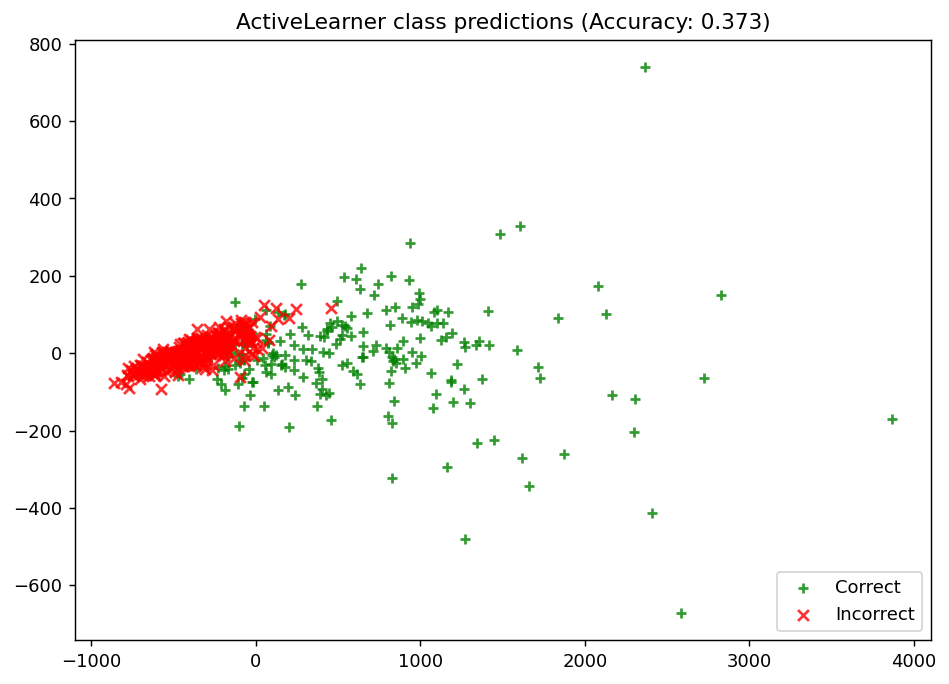

In [ ]:
unqueried_score = learner.score(X, y)

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()


In [ ]:
N_QUERIES = 40
performance_history = [unqueried_score]


for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  X_p, y_p = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X_p, y=y_p)

  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  model_accuracy = learner.score(X, y)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  performance_history.append(model_accuracy)

Accuracy after query 1: 0.9473
Accuracy after query 2: 0.9701
Accuracy after query 3: 0.9525
Accuracy after query 4: 0.9578
Accuracy after query 5: 0.9508
Accuracy after query 6: 0.9578
Accuracy after query 7: 0.9684
Accuracy after query 8: 0.9490
Accuracy after query 9: 0.9561
Accuracy after query 10: 0.9561
Accuracy after query 11: 0.9525
Accuracy after query 12: 0.9666
Accuracy after query 13: 0.9455
Accuracy after query 14: 0.9649
Accuracy after query 15: 0.9578
Accuracy after query 16: 0.9666
Accuracy after query 17: 0.9561
Accuracy after query 18: 0.9631
Accuracy after query 19: 0.9649
Accuracy after query 20: 0.9649
Accuracy after query 21: 0.9736
Accuracy after query 22: 0.9666
Accuracy after query 23: 0.9578
Accuracy after query 24: 0.9649
Accuracy after query 25: 0.9789
Accuracy after query 26: 0.9719
Accuracy after query 27: 0.9772
Accuracy after query 28: 0.9772
Accuracy after query 29: 0.9684
Accuracy after query 30: 0.9543
Accuracy after query 31: 0.9754
Accuracy after qu